### 목표
 - 타이타닉 탑승개의 생존 여부를 예측해보자.
 - 간단하게 데이터 시각화를 해보자
 - Baseline Model을 만들어보자.(모델링)
 - 인코딩 개념을 알아보자.

In [1]:
import numpy as np #고차원의 배열을 빠르게 연산하는 도구
import pandas as pd #행,열로 구성된 표 데이터를 다루는 도구
import matplotlib.pyplot as plt #시각화 라이브러리
import seaborn as sns #시각화 라이브러리

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


## Q1. 훈련데이터와 테스트 데이터를 로딩해보자

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

## Q2. 로딩한 데이터 정보를 확인해보자(컬럼 갯수, 결축치 유무, 데이터타입 등)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


 -  결측치 : Age, Cabin, Embarked

In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


- 결측치 : Age, Fare, Cabin

## Q3. 정답컬럼의 비율을 알아보자.

In [10]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

## Q4. 기술통계 값 확인

In [11]:
train.describe() 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# 범주형 데이터 기술 통계 확인

In [13]:
train[['Name','Sex','Ticket','Cabin','Embarked']].describe()

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Andrew, Mr. Edgardo Samuel",male,1601,G6,S
freq,1,577,7,4,644


## 데이터 시각화
- 범주형 데이터
  - 반도기반의 시각화 방법 : bar char pie chart
- 수지형 데이터
  - 시계열 데이터 : line plot
  - 두 변수 사이의 관계를 보기위한 그래프 : scatter plt
  - 수치 데이터를 구간화하는 그래프(밀집도) : histogram.KDE(커널밀도추정)
- 텍트스 데이터(비정형)
  - 정형화한 후 빈도를 보는 방법
  - 단어와 단어 사이를 쪼개서 빈도를 보는 그래프: wordcloud

## 범주형 데이터 시각화

## Pclass 시각화

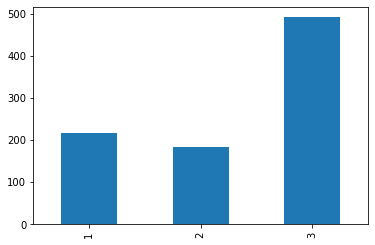

In [17]:
# 데이터 프레임 시각화
# 등급별 사람 수를 시각화
train['Pclass'].value_counts().sort_index().plot(kind='bar')

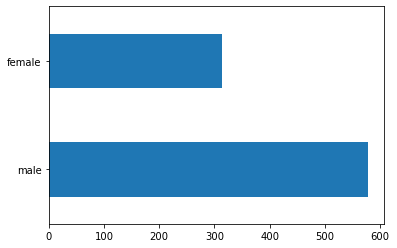

In [20]:
train['Sex'].value_counts().plot(kind='barh')

## 생존여부를 중심으로 시각화해보자!!

In [24]:
train.pivot_table(index='Sex',columns = 'Survived', values = 'Pclass',aggfunc="count")

Survived,0,1
Sex,,
female,81,233
male,468,109


In [ ]:
# values 를 결측치가 없는것으로 햇음(영향을 안주는 것으로)

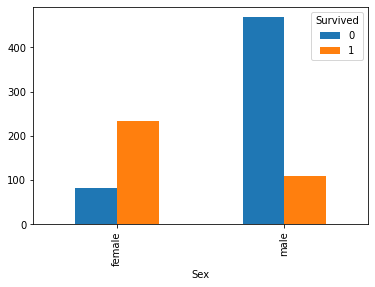

In [25]:
train.pivot_table(index='Sex',columns = 'Survived', values = 'Pclass',aggfunc="count").plot(kind = 'bar')

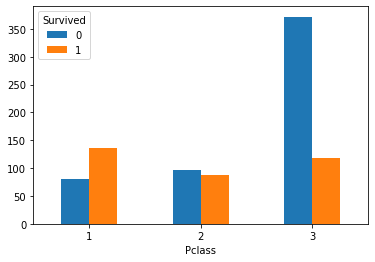

In [30]:
# 등급 생존 여부
train.pivot_table(index='Pclass',
                  columns = 'Survived',
                  values = 'Name',
                  aggfunc="count").plot(kind = 'bar',rot=0)

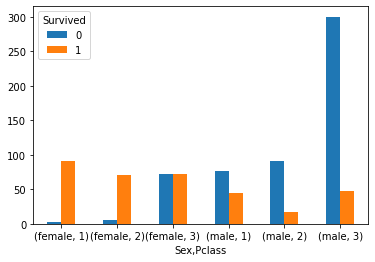

In [33]:
#등급, 성별, 생존여부
train.pivot_table(index=['Sex','Pclass'],
                  columns = 'Survived',
                  values = 'Name',
                  aggfunc="count").plot(kind = 'bar',rot=0)

## 수치형 데이터 시각화

In [34]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

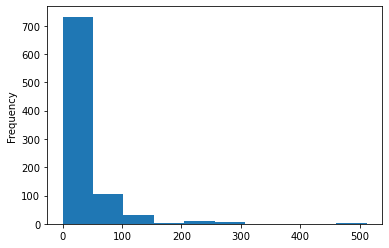

In [40]:
# 히스토그램
#plt.hist(train["Fare"])
train['Fare'].plot(kind = 'hist')